# 14/06/220

# Step 1: Model Training and Validation


In [0]:
!pip install pycaret

### Flask
Flask is a framework that allows you to build web applications. A web application can be a commercial website, a blog, e-commerce system, or an application that generates predictions from data provided in real-time using trained models

In [0]:
!pip install Flask

### GitHub
GitHub is a cloud-based service that is used to host, manage and control code. Imagine you are working in a large team where multiple people (sometime hundreds of them) are making changes

### Heroku
Heroku is a platform as a service (PaaS) that enables the deployment of web apps based on a managed container system, with integrated data services and a powerful ecosystem. In simple words, this will allow you to take the application from your local machine to the cloud so that anybody can access it using a Web URL

### Why Deploy Machine Learning Models
The deployment of ML models is the process of making models available in production where web applications, enterprise software and APIs can consume the trained model by providing new data points and generating predictions

> Normally models are built so that they can be used to predict an outcome **(binary value i.e. 1 or 0 for Classification, continuous values for Regression, labels for Clustering etc.** 

There are 2 broad ways of generating predictions 

+ (i) predict by batch
+ (ii) predict in real-time

This experiment we'll deploy a machine learning model to predict in real-time

### Workflow

![alt text](https://drive.google.com/uc?export=view&id=1k_HUigpP_FJO7Gr7MeHlyFVjEav8DK7d)

## Business Problem
An insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics at the time of hospitalization

## The Objective
To build a web application where demographic and health information of a patient is entered in a web form to predict charges

In [0]:
# GET DATA
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
data.shape

(1338, 7)

In [0]:
# EXPERIMENT 1
# PERFORMED WITH DEFAULT PRE-PROCESSING SETTINGS
from pycaret.regression import *

In [0]:
s = setup(data, target='charges', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
# MODEL TRAINING AND VALIDATION
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,3.330203e+07,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,4.374648e+07,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,3.179514e+07,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,2.680530e+07,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,4.341053e+07,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,3.616633e+07,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,3.919259e+07,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,4.641504e+07,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,4.037035e+07,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,4.259679e+07,6526.6220,0.7256,0.8131,0.4802


Notice the impact of transformations and automatic feature engineering. The R2 has increased by 10% with very little effort. We can compare the residual plot from our linear regression model for both experiments and observe the impact of transformations and feature engineering on the heteroskedasticity of model

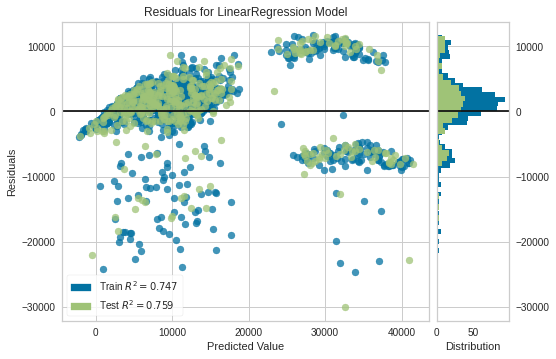

In [0]:
# PLOT TRAINED MODEL
plot_model(lr)

In [0]:
# EXPERIMENT 2
# ADDITIONAL PRE-PROCESSING
s2 = setup(data, target='charges', session_id=123,
      normalize=True,
      polynomial_features=True, # automatic FE
      trigonometry_features=True, # automatic FE
      feature_interaction=True, # automatic FE
      bin_numeric_features=['age', 'bmi']) # binning continuous data into intervals

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'smoker_no_multiply_bmi_Power2',
       'region_southwest_multiply_smoker_no',
       'region_northeast_multiply_bmi_Power2', 'smoker_no_multiply_sex_female',
       'age_Power2_multiply_children_0', 'bmi_Power2_multiply_children_2',
       'region_southeast_multiply_bmi_Power2', 'age_Power2_multiply_bmi_7.0',
       'age_0.0_multiply_smoker_no', 'age_6.0_multiply_age_Power2',
       'children_1_multiply_bmi_Power2', 'smoker_no_multiply_age_Power2',
   

In [0]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3002.0314,2.067636e+07,4547.1264,0.8765,0.4143,0.3491
1,3587.9501,3.307716e+07,5751.2745,0.8077,0.4613,0.3508
2,3074.7333,2.397912e+07,4896.8475,0.6964,0.5542,0.4005
3,3265.8124,2.736285e+07,5230.9516,0.7715,0.5598,0.4884
4,3318.9932,2.901804e+07,5386.8400,0.7842,0.4723,0.3094
5,3196.0219,2.430158e+07,4929.6628,0.8437,0.3688,0.2825
6,2979.9398,2.600986e+07,5099.9865,0.8230,0.3913,0.3206
7,3502.4640,3.048165e+07,5521.0194,0.8324,0.5875,0.3120
8,3176.8643,2.282136e+07,4777.1711,0.8526,0.4003,0.3472
9,3295.7117,2.918288e+07,5402.1177,0.8120,0.5209,0.3772


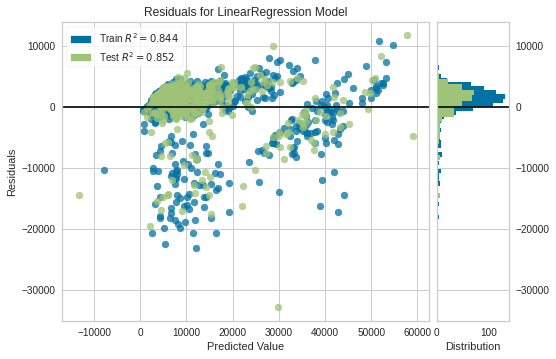

In [0]:
# PLOT TRAINED MODEL
plot_model(lr)

ML is an iterative process. A Number of iterations and techniques are used depending on how critical the task/problem is and what the impact will be if predictions are wrong. The severity and impact of a model to predict a patient outcome in real-time in the ICU of a hospital is far more than a model built to predict customer churn

In this experiment, we have performed only 2 iterations and the linear regression model from the 2nd experiment will be used for deployment

> At this stage, however, the model is still only an object within our notebook. To save it as a file that can be transferred to and consumed by other applications, run the following code

In [0]:
# SAVE TRANSFORMATION PIPELINE AND MODEL
save_model(lr, '/deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [0]:
# PREVIEW THE PIPELINE AND MODEL STORED IN VARIABLE
deployment_28042020 = load_model('/deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [0]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [0]:
import requests

url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url, json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())


75714.0


# Step 2: Build Web App
This will connect to and generate predictions on new data in real-time

2 parts to this application

+ (i) front-end designed using HTML
+ (ii) back-end developed using Flask

## Front-end of Web Application
Generally, the front-end of web applications are built using HTML which is not the focus of this experiment. We have used a simple HTML template and a CSS style sheet to design an input form

You don’t need to be an expert in HTML to build simple applications. There are numerous free platforms that provide HTML and CSS templates as well as enable building beautiful HTML pages quickly by using a drag and drop interface

### CSS Style Sheet
CSS (also known as Cascading Style Sheets) describes how HTML elements are displayed on a screen. It's an efficient way of controlling the layout of your application. Style sheets contain information such as
 
+ background color
+ font size
+ and color 
+ margins etc. 

They are saved externally as a .css file and is linked to HTML but including 1 line of code

```
# style.css
@import url(https://fonts.googleapis.com/css?family=Open+Sans);
.btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #333333; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.25); border: 1px solid #e6e6e6; -webkit-border-radius: 4px; -moz-border-radius: 4px; border-radius: 4px; -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); -moz-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); cursor: pointer; *margin-left: .3em; }
.btn:hover, .btn:active, .btn.active, .btn.disabled, .btn[disabled] { background-color: #e6e6e6; }
.btn-large { padding: 9px 14px; font-size: 15px; line-height: normal; -webkit-border-radius: 5px; -moz-border-radius: 5px; border-radius: 5px; }
.btn:hover { color: #333333; text-decoration: none; background-color: #e6e6e6; background-position: 0 -15px; -webkit-transition: background-position 0.1s linear; -moz-transition: background-position 0.1s linear; -ms-transition: background-position 0.1s linear; -o-transition: background-position 0.1s linear; transition: background-position 0.1s linear; }
.btn-primary, .btn-primary:hover { text-shadow: 0 -1px 0 rgba(0, 0, 0, 0.25); color: #ffffff; }
.btn-primary.active { color: rgba(255, 255, 255, 0.75); }
.btn-primary { background-color: #4a77d4; background-image: -moz-linear-gradient(top, #6eb6de, #4a77d4); background-image: -ms-linear-gradient(top, #6eb6de, #4a77d4); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#6eb6de), to(#4a77d4)); background-image: -webkit-linear-gradient(top, #6eb6de, #4a77d4); background-image: -o-linear-gradient(top, #6eb6de, #4a77d4); background-image: linear-gradient(top, #6eb6de, #4a77d4); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#6eb6de, endColorstr=#4a77d4, GradientType=0);  border: 1px solid #3762bc; text-shadow: 1px 1px 1px rgba(0,0,0,0.4); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.5); }
.btn-primary:hover, .btn-primary:active, .btn-primary.active, .btn-primary.disabled, .btn-primary[disabled] { filter: none; background-color: #4a77d4; }
.btn-block { width: 100%; display:block; }

* { -webkit-box-sizing:border-box; -moz-box-sizing:border-box; -ms-box-sizing:border-box; -o-box-sizing:border-box; box-sizing:border-box; }

html { width: 100%; height:100%; overflow:hidden; }

body { 
	width: 100%;
	height:100%;
	font-family: 'Open Sans', sans-serif;
	background: #092756;
	color: #fff;
	font-size: 18px;
	text-align:center;
	letter-spacing:1.2px;
	background: -moz-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%),-moz-linear-gradient(top,  rgba(57,173,219,.25) 0%, rgba(42,60,87,.4) 100%), -moz-linear-gradient(-45deg,  #670d10 0%, #092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -webkit-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -webkit-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -o-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -o-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -o-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -ms-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -ms-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -ms-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), linear-gradient(to bottom,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), linear-gradient(135deg,  #670d10 0%,#092756 100%);
	filter: progid:DXImageTransform.Microsoft.gradient( startColorstr='#3E1D6D', endColorstr='#092756',GradientType=1 );

}
.login { 
	position: absolute;
	top: 40%;
	left: 50%;
	margin: -150px 0 0 -150px;
	width:400px;
	height:400px;
}

.login h1 { color: #fff; text-shadow: 0 0 10px rgba(0,0,0,0.3); letter-spacing:1px; text-align:center; }

input { 
	width: 100%; 
	margin-bottom: 10px; 
	background: rgba(0,0,0,0.3);
	border: none;
	outline: none;
	padding: 10px;
	font-size: 13px;
	color: #fff;
	text-shadow: 1px 1px 1px rgba(0,0,0,0.3);
	border: 1px solid rgba(0,0,0,0.3);
	border-radius: 4px;
	box-shadow: inset 0 -5px 45px rgba(100,100,100,0.2), 0 1px 1px rgba(255,255,255,0.2);
	-webkit-transition: box-shadow .5s ease;
	-moz-transition: box-shadow .5s ease;
	-o-transition: box-shadow .5s ease;
	-ms-transition: box-shadow .5s ease;
	transition: box-shadow .5s ease;
}
input:focus { box-shadow: inset 0 -5px 45px rgba(100,100,100,0.4), 0 1px 1px rgba(255,255,255,0.2); }
```

```
# home.html
<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <title>Predict Insurance Bill</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link type="text/css" rel="stylesheet" href="{{ url_for('static', filename='./style.css') }}"> # link to css style sheet
  
</head>

<body>
 <div class="login">
	<h1>Predict Insurance Bill</h1>

     <!-- Form to enter new data for predictions  --> # update fields for input form here
    <form action="{{ url_for('predict')}}"method="POST">
      <input type="text" name="age" placeholder="Age" required="required" /><br>
    	<input type="text" name="sex" placeholder="Sex" required="required" /><br>
        <input type="text" name="bmi" placeholder="BMI" required="required" /><br>
        <input type="text" name="children" placeholder="Children" required="required" /><br>
        <input type="text" name="smoker" placeholder="Smoker" required="required" /><br>
        <input type="text" name="region" placeholder="Region" required="required" /><br>

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>

   <br>
   <br>
  
   
 </div>
 {{pred}}

</body>
</html>
```

## Back-end of Web Application
The back-end of a web application is developed using a Flask framework. For beginner’s it is intuitive to consider Flask as a library that you can import just like any other library in Python

If you remember from the Step 1 above we have finalized linear regression model that was trained on 60 features that were automatically engineered by PyCaret. However, the front-end of our web app has an input form that collects only the 6 features i.e. age, sex, bmi, children, smoker, region

How do we transform 6 features of a new data point in real-time into 60 features on which model was trained? With a sequence of transformations applied during model training, coding becomes increasingly complex and time-taking task

> Using PyCaret all transformations such as categorical encoding, scaling, missing value imputation, feature engineering and even feature selection are automatically executed in real-time before generating predictions

```
# build app
from flask import Flask,request, url_for, redirect, render_template, jsonify
from pycaret.regression import *
import pandas as pd
import pickle
import numpy as np

app = Flask(__name__)

model = load_model('deployment_28042020') # loading transformation pipeline and trained model
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

@app.route('/')
def home():
    return render_template("home.html")

@app.route('/predict',methods=['POST'])
def predict():
    int_features = [x for x in request.form.values()]
    final = np.array(int_features)
    data_unseen = pd.DataFrame([final], columns = cols)
    prediction = predict_model(model, data=data_unseen, round = 0) # this is where the MAGIC happens. predict_model() of pycaret applies the entire ML pipeline sequentially and generates predictions using TRAINED
    prediction = int(prediction.Label[0])
    return render_template('home.html',pred='Expected Bill will be {}'.format(prediction))

@app.route('/predict_api',methods=['POST'])
def predict_api():
    data = request.get_json(force=True)
    data_unseen = pd.DataFrame([data])
    prediction = predict_model(model, data=data_unseen)
    output = prediction.Label[0]
    return jsonify(output)

if __name__ == '__main__':
    app.run(debug=True)
```